# **SKILL CRAFT TECHNOLOGY INTERNSHIP**

**TASK2:**

**DATA CLEANING AND EXPLORATORY DATA ANALYSIS (EDA)**

In [21]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Loading the dataset
df=pd.read_csv("/content/titanic_train.csv")

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df.shape

(891, 12)

In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df.isnull().mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [28]:
# drop the cabin column
df.drop('Cabin',axis=1,inplace=True)

# Filling missing values for rest of the column
df['Age'].fillna(df['Age'].median(),inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

/tmp/ipython-input-4042643974.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
/tmp/ipython-input-4042643974.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [29]:
df.isnull().mean()*100

,0
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [30]:
df.duplicated().sum()

np.int64(0)

**VISUALIZATIONS**

In [38]:
survival_counts=df['Survived'].value_counts()
survival_counts

,count
Survived,
0,549
1,342


/tmp/ipython-input-2360531892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='coolwarm')


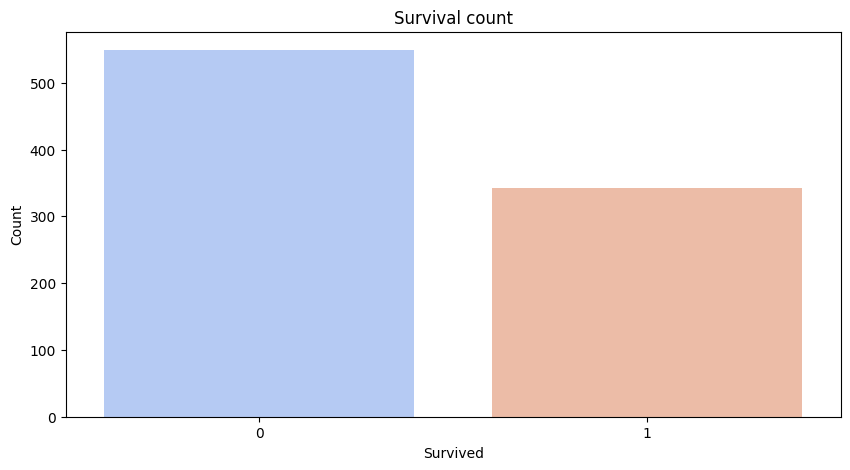

In [36]:
# count plot for survived
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title('Survival count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [39]:
# count of survival by gender
df.rename(columns={'Sex':'Gender'},inplace=True)
df['Gender']=df['Gender'].map({'male':'M','female':'F'})
gender_survival=df.groupby('Gender')['Survived'].value_counts()
gender_survival

Gender  Survived
F       1           233
        0            81
M       0           468
        1           109
Name: count, dtype: int64

Text(0, 0.5, 'Count')

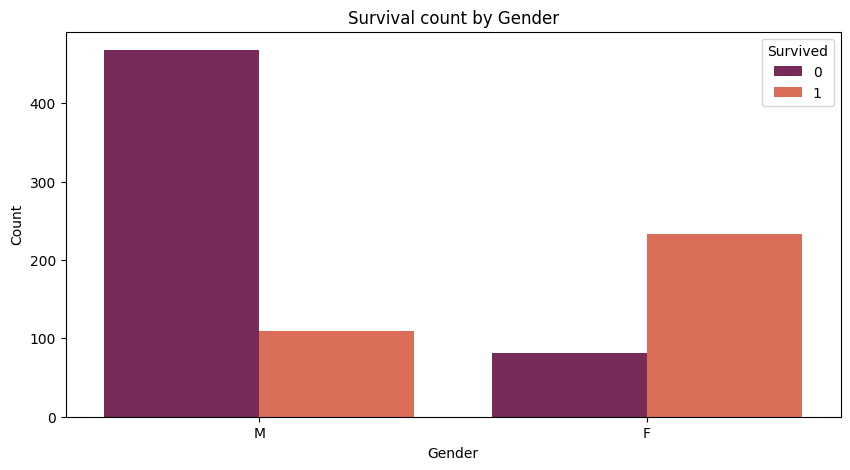

In [40]:
# countplot for survival by Gender
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', hue='Survived', data=df, palette='rocket')
plt.title('Survival count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

In [51]:
# countplot for Pclass
Pclass_survival=df.groupby('Pclass')['Survived'].value_counts()
Pclass_survival


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

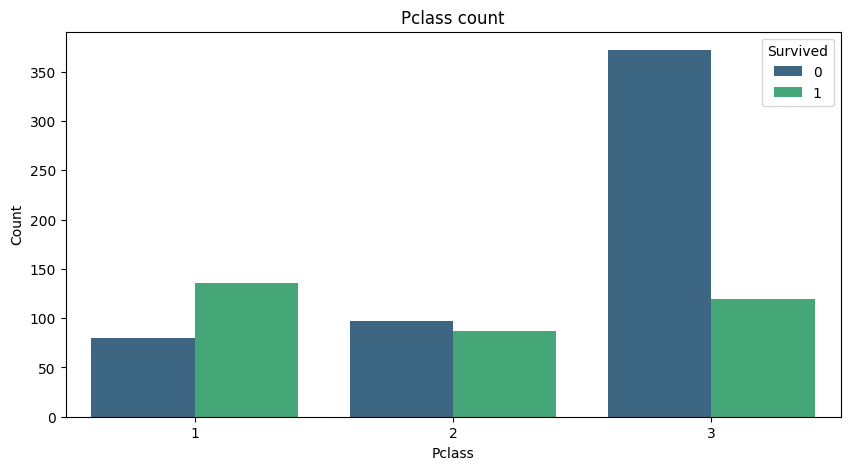

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
plt.title('Pclass count')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Frequency')

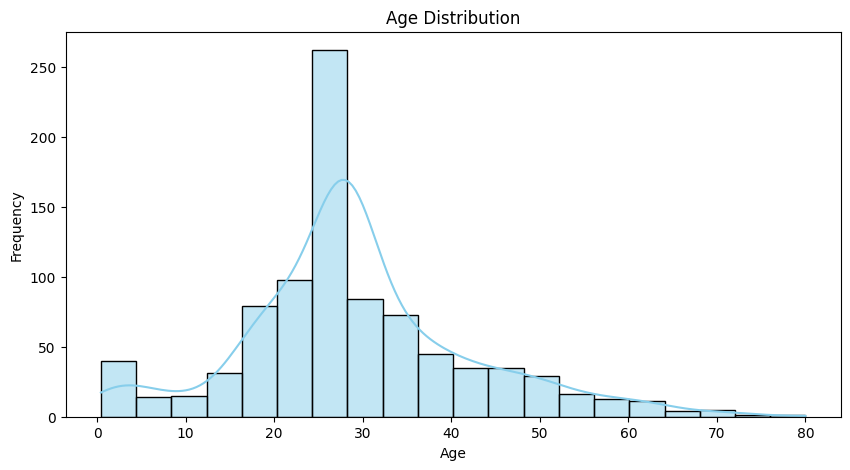

In [43]:
# Histogram for Age
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

/tmp/ipython-input-1249984990.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()
/tmp/ipython-input-1249984990.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=age_survival, palette='viridis')


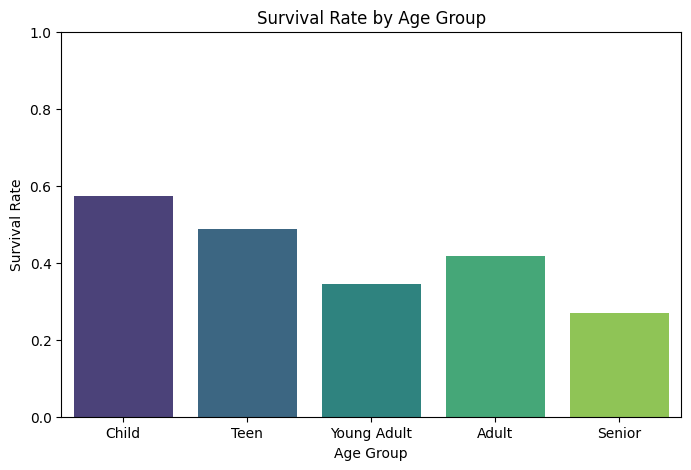

In [49]:
# Define age bins and labels
bins = [0, 12, 18, 35, 60, 120]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate survival rate per age group
age_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()

# Plot survival rate by age group
plt.figure(figsize=(8,5))
sns.barplot(x='AgeGroup', y='Survived', data=age_survival, palette='viridis')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.ylim(0,1)
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

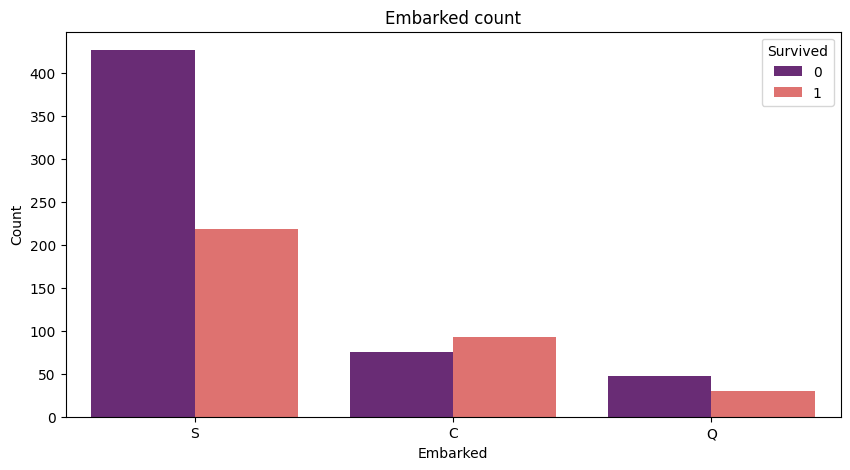

In [45]:
# countplot for Embarked
plt.figure(figsize=(10,5))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='magma')
plt.title('Embarked count')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt

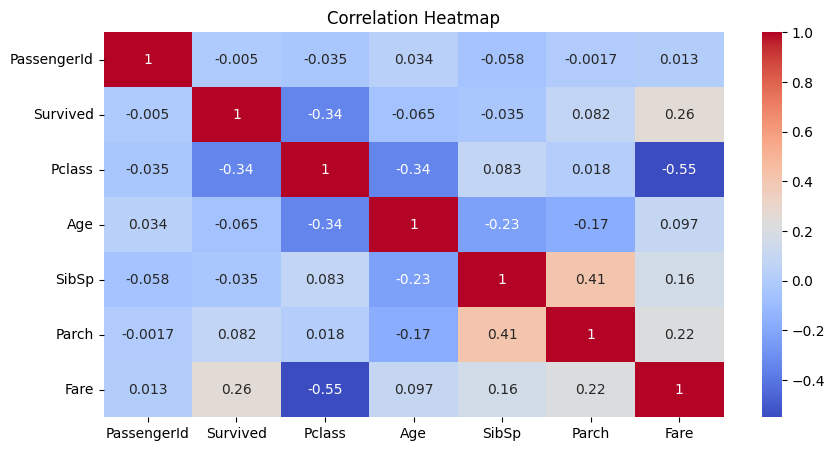

In [48]:
# correlation heatmap of numeric features
numeric_cols= df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(10,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Key Insights

- The dataset showed a clear difference in survival rates between genders, with females having a noticeably higher chance of survival compared to males.  
- Passenger class was an important factor, with higher class passengers tending to survive more often than those in lower classes.  
- Age distribution revealed that younger passengers had better survival prospects compared to older passengers.  
- The port where passengers embarked showed variation in survival, suggesting it plays a role in passenger outcomes..